# SSH発展探究 テーマ「機械学習を用いた太陽光発電の効率化」
65期情報科 3年G組18番 宮本脩平

## 序章

### 第1節 研究の動機

国土における林野の割合が大きい日本は,
砂漠国のような大規模太陽光発電所を作るのは厳しい.
また, 気候も不安定で日照時間が長いとは言えず,
安定した発電は望めない.

この研究は, Solar Trackerの製作を通じて,
機械学習を用いた太陽光発電の効率化手法の探究,
提案を目的としている.

### 第2節 これまでの研究内容

中学1年より太陽電池について継続研究しているが,
毎年視点を変えている.

#### 中学校での自由研究 (中学1年)


1枚の太陽電池の発電量を上げることを目的に,
以下の操作をした太陽電池の開放電圧を記録した.

1. 太陽電池を地面水平に置いた.
2. 太陽電池を床に向けて固定し, 床に凸面鏡を上向きに置いた.
3. 太陽電池を南側へ少し傾けた.
4. 太陽電池を傘の持ち手部分に固定し, 傘内側に貼ったアルミテープで光を集めた.
  傘は南側へ少し傾けた.

結果から以下のことがわかった.

- 凸面鏡は太陽電池の発電量を上げない.
- 太陽電池を南側へ傾けると正午に発電量が上がる.
- 太陽電池を南側へ傾けると朝夕に発電量が下がる.
- パラボラ方の凹面鏡は曇天時に発電量が下がる.

#### 中学校での自由研究 (中学2年)

前年の実験の結果から太陽電池の発電量は温度と負の相関があると予想し,
懐炉を用いた比較実験で太陽電池の発電量は表面温度と負の相関があることを確かめた.
そして, 以下の操作をした太陽電池の, 表面温度と開放電圧, 
放熱に要した消費電力を記録した.

1. 何も取り付けていない太陽電池.
2. 太陽電池裏面にヒートシンクを取り付けた.
3. 太陽電池裏面にヒートシンクと放熱ファンを取り付け, 動作させた.
4. 太陽電池裏側にペルチェ素子とヒートシンクと放熱ファンを取り付け, 動作させた.

結果から以下のことがわかった.

- ヒートシンク・放熱ファンは太陽電池の表面温度を下げることができる.

ここで, 開放電圧と消費電力を比較することができず,
発電の収支を検証することはできなかった.

#### 中学校での卒業研究 (中学3年)

前年までの研究の中で,
太陽電池は負荷の大きさによって電力が変わる性質があることを知り,
パワーLEDを当てた太陽電池に可変抵抗器を繋いで, 電圧と電流の関係を記録した.
その結果, 開放電圧の約8割の電圧で最大電力点になるということがわかった.
そして, そのことを用いた最大電力点追従制御装置を設計し,
効果を検証した. その結果,
負荷によっては装置無しの太陽電池より発電量が大きくなることもあったが,
小さくなることもあり, 設計が不十分であるとわかった.

#### 2019年PCSHSCR交流での探究 (高校1年)

中学1年の自由研究で太陽に向いた太陽電池は発電量が上がるとわかったので,
Solar Trackerを設計し, 効果を検証した.
設計したSolar Trackerの特徴は以下.

- 太陽電池は地軸と平行な1軸を持つ.
- 太陽電池に固定された東西2つの照度センサーによって明るい方向へ傾ける.

装置無しの太陽電池(地軸と平行に南へ傾けた)との比較実験を通して,

- 曇りの日などには不安定.
- 時間がかかり, 電力を多く消費する.

などの欠点がわかった. 

#### SSH探究 (高校2年)

地面に固定されたいくつかのセンサーによって明るさを測り,
最高点の方向を予想する方式が効果的であると予想し,
1軸Solar Trackerにおけるモデルを設計した.
計算によって得られた疑似的な計測値を
線形回帰によって機械学習したが,
期待された効果は得られなかった.

### 第3節 SSH発展探究での目的

- 前年の研究では計算によって計測値を作成したが,
  実際の空の明るさ分布を記録し, 計算による計測値の妥当性を示す.

- 2軸Solar Trackerを前提に研究し, 装置の構造に依らない一般的な手法を模索する.

<!-- - Solar Trackerの動作タイミングについての研究をする. -->

### 第4節 SSH発展探究の計画

1. 日中の空の明るさ分布図(以下, 天球と呼ぶ)を実験より作成する.
1. 1の天球を簡単な関数(以下, 天球関数と呼ぶ)で再現できないか分析する.
1. モデルを作り, 2の関数を用いて検証をする.
1. 3のモデルをマイコンに実装し, 実際にSolar Trackerを作成して検証, 効果をまとめる.

## 第1章 天球の作成

### 第1節 概要

天球関数を作成するために,
フォトトランジスタを用いた実験装置を作成し,
2020年4月より8月にかけて不定期に記録をした.

### 第2節 手法

1. フォトトランジスタ[NJL7302](http://akizukidenshi.com/download/ds/jrc/NJL7302L-F3.pdf)で照度測定回路を組み,
  2軸のサーボモータで天球上の複数方向(以下, 計測点と呼ぶ)に向け,
  [MCP3208](http://akizukidenshi.com/download/MCP3208.pdf)で
  $V_{\mathrm{R}_1}$ を測定した.

  ```
  Vcc -- (C) NJL7302 (E) -- R1 -- GND
  ```

  ただし, $V_\mathrm{CC} = 3.3 \, \mathrm{V}$,
  $R_1 = 180 \, \Omega$.

1. 各計測点の
  
  1. 東から北まわりの方角 $\phi$ [$\mathrm{rad}$]
  1. 天頂から地平線方向への角度 $\theta$ [$\mathrm{rad}$]
  1. 実験回路における $V_{\mathrm{R}_1}$ [$\mathrm{V}$],
  光電流 $I_\mathrm{L}$ [$\mathrm{A}$]
  
  を復元可能な状態で, 時刻とともに記録した.  
  (以下, この記録をまとめて, 天球と呼ぶ.)

1. 1~2を, 4月から8月の期間で不定期に計測し, 1000強の天球を収集した.

実験は東京都練馬区の民家屋上(地上約10m)で行い,
気温は参考値である.

In [1]:
v_cc = 3.3
r_1 = 180

### 第3節 採集したデータ

採集したデータはJSONファイルの形式で https://github.com/65g18/ST_DATA 内 `data/` に保管した.

In [2]:
!git clone https://github.com/65g18/ST_DATA
dataDir = "./ST_DATA/data"

# Dataの取得
## JSON file名のlistの取得
import glob
dataFilePathList = glob.glob(dataDir + "/*.json")
## データの格納
import json
data = []
for dataFilePath in dataFilePathList:
  dataFile = open(dataFilePath, "r")
  dataTemp = json.load(dataFile)
  data.append(dataTemp)

Cloning into 'ST_DATA'...
remote: Enumerating objects: 1025, done.
remote: Counting objects: 100% (1025/1025), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1025 (delta 1013), reused 1025 (delta 1013), pack-reused 0
Receiving objects: 100% (1025/1025), 7.83 MiB | 8.95 MiB/s, done.
Resolving deltas: 100% (1013/1013), done.


以下に結果のJSONファイルの仕様と復元方法を記す.

```json
[
  {
    "time": (Unix Time Stamp),
    "temperature": (degree Celsius),
    "contents": [
      {
        "theta": (theta),
        "phi": (phi),
        "value": (value)
      },
      // ...
    ]
  },
  // ...
]
```

ただし, 
$t =$ `theta`,
$p =$ `phi`,
$r = $ `value` としたとき,
各値は以下のように復元される.

- 東から北まわりの方角 $\phi$ [$\mathrm{rad}$]
  $$
  \phi = \frac{\pi}{180}(360 - p).
  $$

  ```python
  np.radians(360 - phi)
  ```

- 天頂から地平線方向への角度 $\theta$ [$\mathrm{rad}$]
  $$
  \theta = \frac{\pi}{180}t.
  $$

  ```python
  np.radians(360 - theta)
  ```

- 実験回路における $V_{\mathrm{R}_1}$ [$\mathrm{V}$],
  $I_\mathrm{L}$ [$\mathrm{A}$]
  (ただし, $V_{\mathrm{CC}} = 3.3 \, \mathrm{V}$,
  $R_1 = 180 \, \mathrm{\Omega}$)
  $$
  V_{\mathrm{R}_1} = \frac{r}{2^{12}} V_{\mathrm{CC}}.
  $$

  $$
  I_\mathrm{L} = \frac{V_{\mathrm{R}_1}}{R_1}.
  $$

  ```python
  v_r_1 = (value / 2**12) * v_cc
  i_l = v_r_1 / r_1
  ```

In [3]:
# データの復元
from pytz import timezone
import datetime
import numpy as np

timestamp = [data[i]["time"] for i in range(len(data))]
date = [datetime.datetime.fromtimestamp(timestamp[i])
          .astimezone(timezone('Asia/Tokyo')) \
        for i in range(len(data))]
temp = [data[i]["temperature"] for i in range(len(data))]
contents = [data[i]["contents"] for i in range(len(data))]

theta = [[np.radians(c["theta"]) for c in contents[i]] for i in range(len(data))]
phi   = [[np.radians(360 - c["phi"]) for c in contents[i]] for i in range(len(data))]
v_r_1 = [[c["value"]/ 2**12 * v_cc for c in contents[i]] for i in range(len(data))]
i_l   = [[v / r_1 for v in v_r_1[i]] for i in range(len(data))]

0番目の天球を, matplotlibによって描画すると,
以下のようになる.
中心が天頂, 縁が地平線で, 色は光電流の大きさを表し,
見易さのために $\theta$ の値によって点の大きさを変えている. 
また, $\theta$ の目盛りは度数法で表記している.

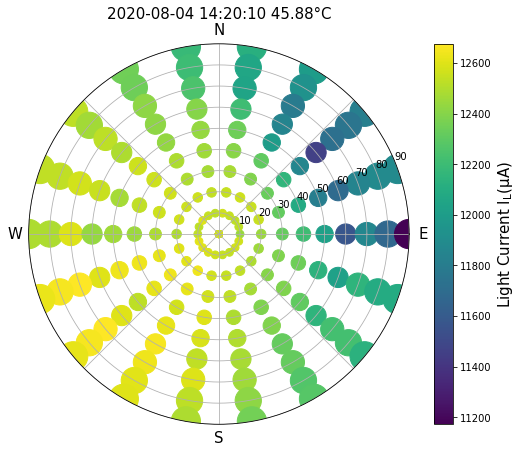

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 0番目の天球を選択
num = 0

# 天球の描画
fig = plt.figure(figsize=(9,7))

ax = fig.add_subplot(1,1,1, projection="polar")
ax.set_title("{0:%Y-%m-%d %H:%M:%S}".format(date[num]) + " " + str(temp[num]) + "°C", fontsize=15)
ax.set_xticklabels(["E","","N","","W","","S",""], fontsize = 15)
ax.set_ylim(0, 90)
area  = [np.rad2deg(t) ** 2 / 10 + 50 for t in theta[num]]
sct = ax.scatter(phi[num], [np.rad2deg(t) for t in theta[num]], \
                    c=[i * 10 ** 6 for i in i_l[num]], s=area)
colb = plt.colorbar(sct)
colb.set_label(r"Light Current $\mathrm{I}_\mathrm{L}$(µA)", fontsize=15)

plt.show()

上のコードにおいて `num` を適当に変えることで,
別の天球を描画することができる.

## 第2章 天球関数の作成


### 第1節 天球の分析

天球を描画すると, 
ある1方向が明るく,
その方向から離れるほど暗くなる様子がわかる.
例えば, 2020年4月2日8時50分8秒の天球では南西 $\theta = \frac{\pi}{4}$ 付近が最も明るい.

このことより, ある方向に1つの光源があり,
センサーが受けとる光が角度によって変化すると考えることができると予想した.

### 第2節 天球関数の理論

天球上の位置 $(\theta, \phi)$ から明るさ $r$
を求める関数を **天球関数** と呼ぶ.

ある天球内 $(\Theta, \Phi)$ の方向の十分遠い位置に1つの光源があり,
天球の中心にある太陽電池の向いている方向を $(\theta, \phi)$ とする.

太陽電池の向いている方向と光源の方向の角度を $\psi$ とおくと,
球面三角法の余弦定理より,

$$
\cos \psi = 
  \cos \Theta \cos \theta +
  \sin \Theta \sin \theta \cos \left(
    \Phi - \phi
  \right).
$$

天球中心で, 光源からの光線に垂直な平面における,
単位面積あたりの明るさを $E$ とし.
太陽電池の面積を $S$ とする.
すると,
光源による太陽電池表面の明るさは $ES \cos \psi$ である.

ここで, $\psi$ によらない $ES$ を $R$,
$\psi = \frac{\pi}{2}$ の時の明るさ
(つまり, 光源によらない太陽電池表面の明るさ) を $C$ とおくと,
太陽電池表面の明るさ $r$ は,

$$
r = R \cos \psi + C
$$

と表現できる.

$\cos \psi$ を代入して,

$$
  r = R \left\{
    \cos \Theta \cos \theta +
    \sin \Theta \sin \theta \cos \left(
      \Phi - \phi
    \right)
  \right\} + C.
$$

### 第3節 天球関数の検証

ここでは,
前節の天球関数を第1章を, 採集した天球を用いて精度の評価をする.

明るさを表わす数を $r$ とする.
$m$ 番目の天球の $n$ 番目の観測点の$r$, $I_\mathrm{L}$ をそれぞれ
$r^{(m)}_n$, $I^{(m)}_{\mathrm{L},n}$とし,
$m$ 番目の天球の $I_\mathrm{L}$ の平均, 標準偏差をそれぞれ
$\mu^{(m)}$, $\sigma^{(m)}$ として,

$$
  r^{(m)}_n =
    \frac{
      I^{(m)}_{\mathrm{L},n} -
      \mu^{(m)}
    }{
      \sigma^{(m)}
    }
$$

と定義する.

なお, 天球の番号 $m$ は明示する必要が無ければ省略する.

In [5]:
# 天球の数
M = len(contents)

# 扱う天球の番号を表す変数
m = 0

print("天球の数: " + str(M))

# n点目の明るさの計測値
i_l_min = [min([i_l[i][j] for j in range(len(contents[i]))]) for i in range(M)]
i_l_ave = [np.average(i_l[i]) for i in range(M)]
i_l_std = [np.std(i_l[i]) for i in range(M)]
def r(n):
  return (i_l[m][n] - i_l_ave[m]) / i_l_std[m]

天球の数: 1017


#### 天球関数

単一光源と仮定し,
光源の位置を
$(\Theta, \Phi)$,
光源による明るさと光源によらない明るさをそれぞれ $R, C$ とする.
ただし, 定義域を
$0 \leq \Theta \leq \frac{\pi}{2}$,
$0 \leq \Phi < 2 \pi$ とする.
また, 天球上 $(\theta, \phi)$ に向けた時の明るさ $r$ とする.
これらの数で表わされる関数 $\hat{r}$,

$$
  \hat{r} = R \left\{
    \cos \Theta \cos \theta +
    \sin \Theta \sin \theta \cos \left(
      \Phi - \phi
    \right)
  \right\} + C
$$

を, 検証する天球関数とする.
$\Theta, \Phi, R, C$ は天球ごとに異なる定数である.

#### 定数の決定

第1章で採集した天球群について,
それぞれの天球における天球関数の定数 $\Theta, \Phi, R, C$ を求める.

定数は, 誤差逆伝播法による機械学習で求める.

In [6]:
# 定数(セット別)
Theta = [ 0 for _ in range(M) ]
Phi   = [ 0 for _ in range(M) ]
R     = [ 0 for _ in range(M) ]
C     = [ 0 for _ in range(M) ]

# 天球関数
def forward(th, ph):
  return R[m] * \
    ( np.cos(Theta[m]) * np.cos(th) \
    + np.sin(Theta[m]) * np.sin(th) * np.cos(Phi[m] - ph) ) \
    + C[m]

1つの天球に含まれる測定点の総数を $N$ とし,
$n$ 点目の方向, 明るさを $\theta_n, \phi_n, r_n$ とする.
また, これらを天球関数に代入したときの値を $\hat{r}_n$とする.

そのとき, 誤差逆伝播のための誤差関数 $E$ を,
最小二乗法を用いて以下のように定義する.

$$
  E = \frac{1}{2}
  \sum ^ N _ {n=1}
  \left(
    r_n - \hat{r}_n
  \right) ^ 2.
$$

In [7]:
# データセットmに含まれる計測点の数
N = [len(contents[i]) for i in range(M)]

# n点目の明るさの天球関数値
def hatr(n):
  return forward(theta[m][n], phi[m][n])

# 誤差関数
def E():
  return 1/2 * np.sum([(r(n) - hatr(n))**2 for n in range(N[m])])

定数の決定は以下の手順で行なう.
ただし,
$$
  a_n =
    \cos \Theta \cos \theta_n +
    \sin \Theta \sin \theta_n \cos \left(
      \Phi - \phi_n
    \right),
$$
$$
  \begin{align}
    \overline{a} &= \frac{1}{N} \sum ^ N _ {n=1} a_n, &
    \overline{a \cdot a} &= \frac{1}{N} \sum ^ N _ {n=1} a_n^2, \\
    \overline{r} &= \frac{1}{N} \sum ^ N _ {n=1} r_n, &
    \overline{a \cdot r} &= \frac{1}{N} \sum ^ N _ {n=1} a_n r_n \\
  \end{align}
$$
とおく.

1. $(\Theta, \Phi)$ に天頂 $(0,0)$ を代入.

1. $R, C$ について, 以下の計算をする.
$$
  \begin{align}
    R &=
      \frac{
        \overline{a \cdot r} -
        \overline{a} \cdot \overline{r}
      }{
        \overline{a \cdot a} -
        \overline{a} \cdot \overline{a}
      }, \\
    C &=
      \frac{
        \overline{a \cdot a} \cdot \overline{r} -
        \overline{a} \cdot \overline{a \cdot r}
      }{
        \overline{a \cdot a} -
        \overline{a} \cdot \overline{a}
      }.
  \end{align}
$$

1. $\Theta, \Phi$ について, 以下の計算をする.
$$
  \begin{align}
    \Theta_\mathrm{new} &=
      \Theta_\mathrm{old} -
      \alpha
      \left.
        \frac{\partial E}{\partial \Theta}
      \right|
      _{\Theta = \Theta_\mathrm{old}}, \\
    \Phi_\mathrm{new} &=
      \Phi_\mathrm{old} -
      \alpha
      \left.
        \frac{\partial E}{\partial \Phi}
      \right|
      _{\Phi = \Phi_\mathrm{old}}.
  \end{align}
$$
ただし, $\alpha$ は学習率を表わす定数であり,
$$
  \begin{align}
    \frac{\partial E}{\partial \Theta} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}
      R \, \frac{\partial a_n}{\partial \Theta}, \\
    \frac{\partial E}{\partial \Phi} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}
      R  \, \frac{\partial a_n}{\partial \Phi}, \\
    \frac{\partial a_n}{\partial \Theta} &=
      - \sin \Theta \cos \theta_n +
      \cos \Theta \sin \theta_n \cos \left(
        \Phi - \phi_n
      \right), \\
    \frac{\partial a_n}{\partial \Phi} &=
      - \sin \Theta \sin \theta_n \sin \left(
        \Phi - \phi_n
      \right)
  \end{align}
$$
である.
1. 2.~3.(定数の学習)を十分な回数繰り返す.

式の導出については付録I.を参照されたい. 

In [8]:
# 学習記録(天球別)
E_log     = [[] for _ in range(M)]
Theta_log = [[] for _ in range(M)]
Phi_log   = [[] for _ in range(M)]
R_log     = [[] for _ in range(M)]
C_log     = [[] for _ in range(M)]

# a_n
def a(n):
  return np.cos(Theta[m]) * np.cos(theta[m][n]) \
    + np.sin(Theta[m]) * np.sin(theta[m][n]) * np.cos(Phi[m] - phi[m][n])

# a_n の偏導関数(Theta)
def pa_pTheta(n):
  return - np.sin(Theta[m]) * np.cos(theta[m][n]) \
    + np.cos(Theta[m]) * np.sin(theta[m][n]) * np.cos(Phi[m] - phi[m][n])

# a_n の偏導関数(Phi)
def pa_pPhi(n):
  return - np.sin(Theta[m]) * np.sin(theta[m][n]) * np.sin(Phi[m] - phi[m][n])

# 定義域から外れた時の調整
def definition():
  global Theta, Phi
  while           Theta[m] < 0 :
    Theta[m] = - Theta[m]
    Phi[m] += np.pi
  while np.pi*2 < Theta[m]     : Theta[m] -= 2 * np.pi
  while            Phi[m]  < 0 : Phi[m] += 2 * np.pi
  while np.pi*2 <  Phi[m]      : Phi[m] -= 2 * np.pi

# 学習率
alpha = 0.001

# 誤差逆伝播
def backward():
  global Theta, Phi, R, C

  # 各平均値の計算
  ba  = np.average([a(n) for n in range(N[m])])
  br  = np.average([r(n) for n in range(N[m])])
  baa = np.average([a(n) * a(n) for n in range(N[m])])
  bar = np.average([a(n) * r(n) for n in range(N[m])])

  # R, Cの計算
  R[m] = (bar - ba * br) / (baa - ba * ba)
  C[m] = (baa * br - ba * bar) / (baa - ba * ba)

  # Eの偏導関数の計算
  pE_pTheta = 0
  pE_pPhi = 0
  for n in range(N[m]):
    pE_pTheta += - (r(n) - (R[m] * a(n) + C[m])) * R[m] * pa_pTheta(n)
    pE_pPhi   += - (r(n) - (R[m] * a(n) + C[m])) * R[m] * pa_pPhi(n)

  # Theta, Phiの更新
  Theta[m] -= alpha * pE_pTheta
  Phi[m]   -= alpha * pE_pPhi
  definition()

# count回学習する
def learning(count):
  global Theta, Phi, R, C
  global E_log, Theta_log, Phi_log, R_log, C_log

  # 定数の初期化
  Theta[m] = 0
  Phi[m]   = 0
  R[m]     = 0
  C[m]     = 0

  # 学習記録の初期化
  Theta_log[m].clear()
  Phi_log[m].clear()
  R_log[m].clear()
  C_log[m].clear()

  for epoc in range(count):
    backward()

    # 結果を記録する
    E_log[m].append(E())
    Theta_log[m].append(Theta[m])
    Phi_log[m].append(Phi[m])
    R_log[m].append(R[m])
    C_log[m].append(C[m])

コード内の変数 `m` は,
第1章で採集した天球のうち $m$ 番目の天球であることを表わしている.

#### 定性的な検証

前項の定数決定が適切になされているか
(最終的に得られた $(\Theta, \Phi)$ が単光源の位置にあるか)
を, 学習過程をグラフに描画して確かめる.

第1章3節で描画した天球に,
学習過程と得られた $(\Theta, \Phi)$ を重ねて描画する.
赤色のo点は学習過程の $(\Theta, \Phi)$ をプロットしたものである.
また, 黒色のx印最終的に得られた $(\Theta, \Phi)$ を表わしている.

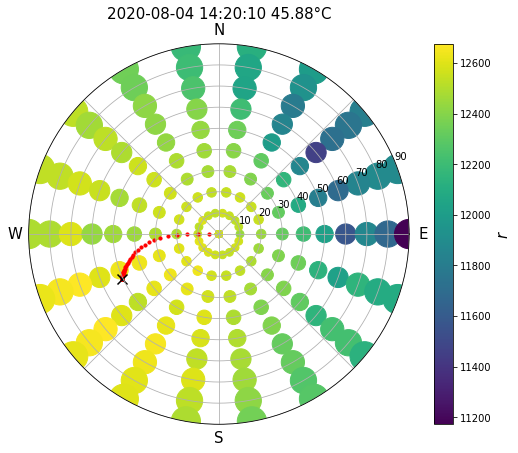

In [9]:
# 一番古いデータを使う
m = num

# 学習 (定数の決定)
learning(50)

# 天球表示
fig = plt.figure(figsize=(9,7))

ax = fig.add_subplot(1,1,1, projection="polar")
ax.set_title("{0:%Y-%m-%d %H:%M:%S}".format(date[m]) + " " + str(temp[m]) + "°C", fontsize=15)
ax.set_xticklabels(["E","","N","","W","","S",""], fontsize = 15)
ax.set_ylim(0, 90)
area1  = [np.rad2deg(t) ** 2 / 10 + 50 for t in theta[m]]
sct = ax.scatter(phi[m], [np.rad2deg(t) for t in theta[m]], \
                    c=[i * 10 ** 6 for i in i_l[m]], s=area1)
colb = plt.colorbar(sct)
colb.set_label(r"$r$", fontsize=15)

# 学習過程をプロット
ax.scatter(Phi_log[m], [np.rad2deg(t) for t in Theta_log[m]], \
            c='red', s=10)

# 得られた単光源の位置をプロット
ax.scatter(Phi[m], np.rad2deg(Theta[m]), c='black', s=100, marker='x')

plt.show()

また, 得られた天球関数のグラフを描画すると以下のようになる.

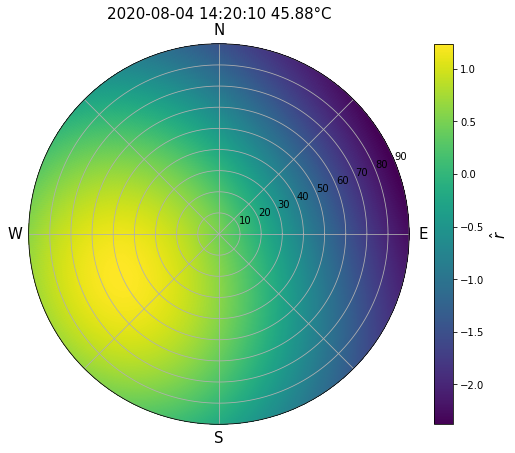

In [10]:
th_range = np.linspace(0, np.pi/2, 500)
ph_range = np.linspace(0, np.pi*2, 500)
th, ph = np.meshgrid(th_range, ph_range)
rh = forward(th, ph)

# 天球表示
fig = plt.figure(figsize=(9,7))

ax = fig.add_subplot(1,1,1, projection="polar")
ax.set_title("{0:%Y-%m-%d %H:%M:%S}".format(date[m]) + " " + str(temp[m]) + "°C", fontsize=15)
ax.set_xticklabels(["E","","N","","W","","S",""], fontsize = 15)
ax.set_ylim(0, 90)
sct = ax.scatter(ph, [np.rad2deg(t) for t in th], c=rh)
colb = plt.colorbar(sct)
colb.set_label(r"$\hat{r}$", fontsize=15)

plt.show()

学習過程のグラフについて,
学習によって $(\Theta, \Phi)$ が明るい方向へと動いていく様子がわかる.
また, 天球関数のグラフにおける

#### 定量的な検証

第1章で採集した全ての天球において
光源の位置と定数 $\Theta, \Phi, R, C$ を計算し,
天球関数値と計測値を, いくつかの代表値によって比較する.

In [11]:
import os
from tqdm import trange

# logファイル
logDir = "./ST_DATA/log"
logFilePath = logDir + "/2_3.npy"

# logが既にあったら省略
if os.path.exists(logFilePath):
  log = np.load(logFilePath, allow_pickle=True).tolist()
  Theta     = log['Theta']
  Phi       = log['Phi']
  R         = log['R']
  C         = log['C']
  E_log     = log['E_log']
  Theta_log = log['Theta_log']
  Phi_log   = log['Phi_log']
  R_log     = log['R_log']
  C_log     = log['C_log']
else:
  for m in trange(M):
    learning(100)
  log = {'Theta':Theta, 'Phi':Phi, 'R':R, 'C':C, \
         'E_log':E_log, 'Theta_log':Theta_log, 'Phi_log':Phi_log, \
         'R_log':R_log, 'C_log':C_log}
  np.save(logFilePath, log)

理論値との誤差 $\varepsilon$ について,

$$
  \varepsilon^{(m)}_n =
    \hat{r}^{(m)}_n - r^{(m)}_n
$$

$\varepsilon$ のヒストグラムと標準偏差は,

In [12]:
r_diff = []

for m in range(M):
  for n in range(N[m]):
    r_diff.append(hatr(n) - r(n))

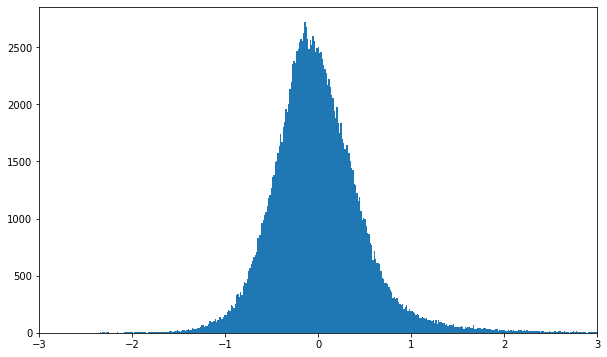

'stdev: 0.5412714461591458'

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(r_diff, bins=1000)
ax.set_xlim(-3, 3)
plt.show()
"stdev: " + str(np.std(r_diff))

また, 平均絶対誤差は,

$$
  \frac{1}{M}
  \sum ^ {M} _ {m=1}
  \frac{1}{N^{(m)}}
  \sum ^ {N^{(m)}} _ {n=1}
  \left|
    \varepsilon^{(m)}_n
  \right|
$$

In [14]:
np.average([abs(d) for d in r_diff])

0.37702544148476586

ここで, $\sqrt{\sum_{n} r_n^2} = 1$ であるから,
以上より誤差は十分に小さいと言える.

また, 天球ごとの $\psi$ $[\mathrm{rad}]$ と $r$ の相関係数について調べる.

$$
  \begin{align}
    \psi^{(m)}_n &=
      \arccos \left\{
        \cos \Theta^{(m)} \cos \theta^{(m)}_n +
        \sin \Theta^{(m)} \sin \theta^{(m)}_n \cos \left(
          \Phi^{(m)}_n - \phi^{(m)}_n
        \right)
      \right\} \\
      &= \arccos a^{(m)}_n
  \end{align}
$$

であるから, 

In [15]:
psi = [[] for _ in range(M)]
r_list = [[] for _ in range(M)]
corr_list = [0 for _ in range(M)]

for m in range(M):
  maxr = max([r(n) for n in range(N[m])])
  minr = min([r(n) for n in range(N[m])])
  for n in range(N[m]):
    if r(n) != 0:
      psi[m].append(np.arccos(a(n)))
      r_list[m].append(r(n))
  corr_list[m] = np.corrcoef(psi[m], r_list[m])[0][1]

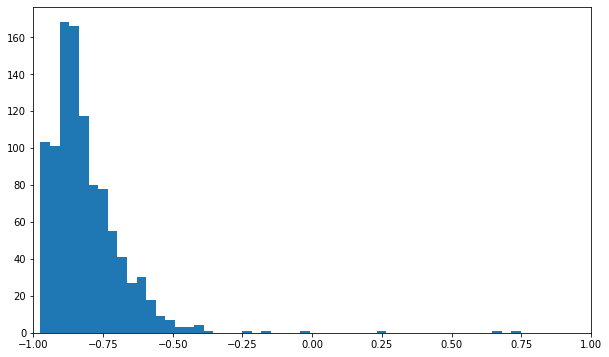

'average: -0.8110737552838326'

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(corr_list, bins=50)
ax.set_xlim(-1, 1)
plt.show()
"average: " + str(np.average(corr_list))

ヒストグラムより,
各天球における $\psi$ と $r$ は,
強い負の相関がある傾向にあることがわかる.
これは第1節の予想と合うものであり,
この天球関数は実際の天球と同じ特徴を持つと考えられる.

### 第4節 結論

天球上 $(\Theta, \Phi)$ に光源があるとし,
適切な定数 $R, C$ を選ぶと,
天球の $(\theta, \phi)$ の明るさ $r$ は,

$$
  r = R \left\{
    \cos \Theta \cos \theta +
    \sin \Theta \sin \theta \cos \left(
      \Phi - \phi
    \right)
  \right\} + C
$$

として表わすことができる.

## 第3章 Solar Trackerのモデル

### 下書き

センサーによって計測する値
$
\mathcal{S} = 
\left\{
  \left(
    \theta_1, \psi_1, r_1
  \right),
  \left(
    \theta_2, \psi_2, r_2
  \right),
  \dots,
  \left(
    \theta_s, \psi_s, r_s
  \right)
\right\}
$
($s \in \mathbb{N}$)
から,
光源の座標 $\left(\Theta,\Psi\right)^\mathsf{T}$
を予想する.

操作 $P: \mathcal{S} \longrightarrow \mathbb{N}^p$

隠れ層のノード数を $h$ として,
$W^{(1)} \in \mathbb{R}^{h \times p}$,
$W^{(2)} \in \mathbb{R}^{2 \times h}$
を重み行列,
$\mathbf{b}^{(1)} \in \mathbb{R}^{p}$,
$\mathbf{b}^{(2)} \in \mathbb{R}^{h}$
を定数ベクトルとして,
光源の球面座標
$\left(\hat{\Theta},\hat{\Psi}\right)^\mathsf{T}$
を下のように定める.

$$
  \begin{align}
    \left(
      \begin{array}{c}
      \hat{\Theta} \\
      \hat{\Psi}
      \end{array}
    \right) =
      W^{(2)}
      f \left(
        W^{(1)}
        \mathbf{x} +
        \mathbf{b}^{(1)}
      \right)
      \mathbf{b}^{(2)}
  \end{align}.
$$

## 付録

#### I. 偏導関数の導出(第2章)

式を簡単にするために

$$
  \begin{align}
    a_n &=
      \cos \Theta \cos \theta_n +
      \sin \Theta \sin \theta_n \cos \left(
        \Phi - \phi_n
      \right), \\
    \frac{\partial a_n}{\partial \Theta} &=
      - \sin \Theta \cos \theta_n +
      \cos \Theta \sin \theta_n \cos \left(
        \Phi - \phi_n
      \right), \\
    \frac{\partial a_n}{\partial \Phi} &=
      - \sin \Theta \sin \theta_n \sin \left(
        \Phi - \phi_n
      \right).
  \end{align}
$$

とおく.
( 天球関数は $\hat{r}_n = R \cdot a_n + C$ と書き換えられる. )

誤差関数 $E$ を $\Theta, \Phi, R, C$ で偏微分すると,

$$
  \begin{align}
    \frac{\partial E}{\partial \Theta} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}
      R \, \frac{\partial a_n}{\partial \Theta}, \\
    \frac{\partial E}{\partial \Phi} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}
      R  \, \frac{\partial a_n}{\partial \Phi}, \\
    \frac{\partial E}{\partial R} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}
      a_n, \\
    \frac{\partial E}{\partial C} &=
      - \sum ^ N _ {n=1}
      \left\{
        r_n - \left(
          R \cdot a_n + C
        \right)
      \right\}.
  \end{align}
$$

$\Theta, \Phi$ が固定のとき,
誤差関数 $E$ を最小にする $R, C$ は一意に定まる.

偏微分係数が $0$ になるときの $R, C$ は,

$$
  \begin{align}
    R &=
      \frac{
        \sum ^ N _ {n=1}
        (r_n - C)
        a_n
      }{
        \sum ^ N _ {n=1}
        a_n^2
      }, \\
    C &=
      \frac{1}{N}
      \sum ^ N _ {n=1}
      \left(
        r_n
        - R \cdot a_n
      \right).
  \end{align}
$$

ここで,

$$
  \begin{align}
    \overline{a} &= \frac{1}{N} \sum ^ N _ {n=1} a_n, &
    \overline{a \cdot a} &= \frac{1}{N} \sum ^ N _ {n=1} a_n^2, \\
    \overline{r} &= \frac{1}{N} \sum ^ N _ {n=1} r_n, &
    \overline{a \cdot r} &= \frac{1}{N} \sum ^ N _ {n=1} a_n r_n \\
  \end{align}
$$

とおくと,

$$
  \begin{align}
    R &=
      \frac{
        \overline{a \cdot r} -
        C \, \overline{a}
      }{
        \overline{a \cdot a}
      }, \\
    C &=
      \overline{r} -
      R \, \overline{a}.
  \end{align}
$$

( $r_n$ は測定値であることに注意. )

これを連立して解いて,

$$
  \begin{align}
    R &=
      \frac{
        \overline{a \cdot r} -
        \overline{a} \cdot \overline{r}
      }{
        \overline{a \cdot a} -
        \overline{a} \cdot \overline{a}
      }, \\
    C &=
      \frac{
        \overline{a \cdot a} \cdot \overline{r} -
        \overline{a} \cdot \overline{a \cdot r}
      }{
        \overline{a \cdot a} -
        \overline{a} \cdot \overline{a}
      }.
  \end{align}
$$

これを代入すれば, 偏導関数から $R, C$ を削除できる.